# Librerías utilizadas:

In [324]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Importación de data set

In [325]:
data = pd.read_csv('c:\\Users\\Nico\\Desktop\\PyE/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [326]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualización de la distribución de variables
* Histograma de las distintas variables

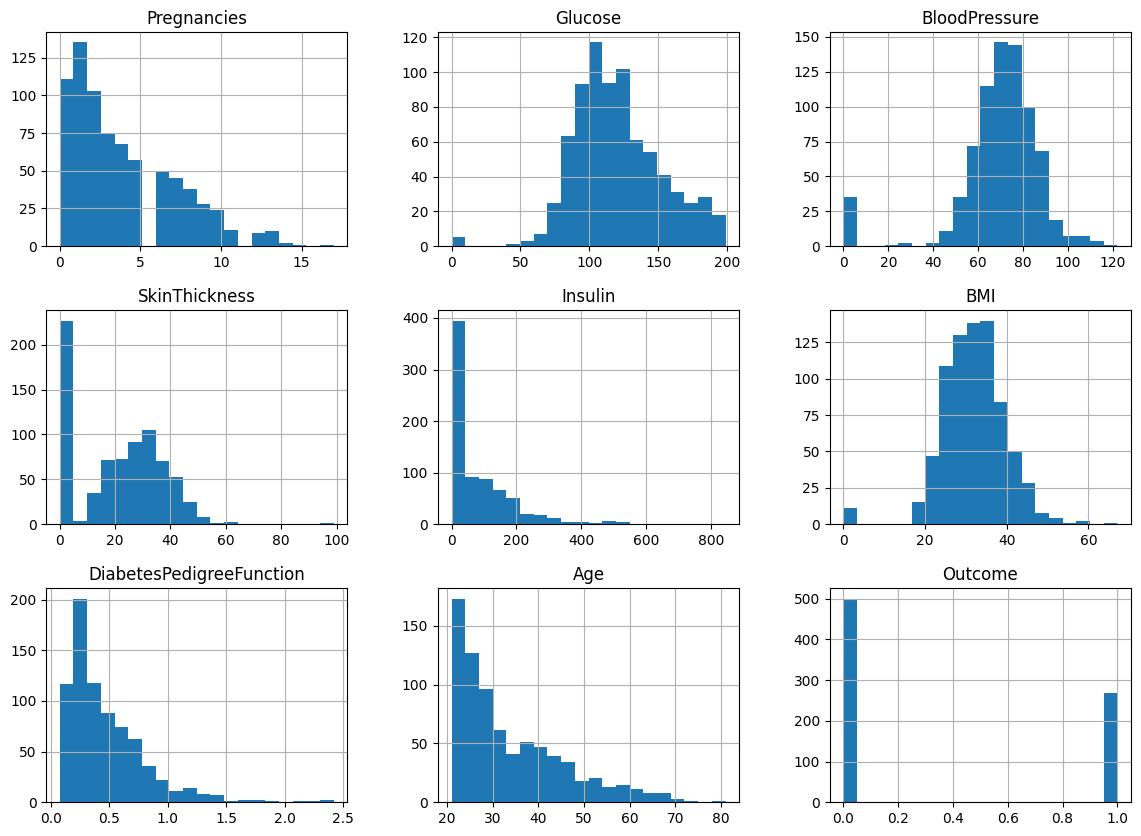

In [327]:
data.hist(bins=20, figsize=(14,10))
plt.show()

# Prueba T-Student
* Esta prueba indica que la diferencia en los niveles de glucosa entre los distintos pacientes tengan o no diabetes es grande
* Es significativa debido al p-value

In [328]:
outcome_0 = data[data['Outcome'] == 0]
outcome_1 = data[data['Outcome'] == 1]

t_stat, p_val = stats.ttest_ind(outcome_0['Glucose'], outcome_1['Glucose'], equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_val}')

T-statistic: -13.751537067396413, P-value: 2.6441613495403223e-36


In [329]:
import numpy as np

mean_0 = np.mean(outcome_0['Glucose'])
mean_1 = np.mean(outcome_1['Glucose'])

std_0 = np.std(outcome_0['Glucose'], ddof=1)
std_1 = np.std(outcome_1['Glucose'], ddof=1)

n_0 = len(outcome_0['Glucose'])
n_1 = len(outcome_1['Glucose'])

t_stat_manual = (mean_0 - mean_1) / np.sqrt((std_0**2 / n_0) + (std_1**2 / n_1))

t_stat_manual

-13.751537067396413

In [330]:
numerator = ((std_0**2 / n_0) + (std_1**2 / n_1))**2
denominator = ((std_0**2 / n_0)**2 / (n_0 - 1)) + ((std_1**2 / n_1)**2 / (n_1 - 1))
df = numerator / denominator

t_stat_manual = (mean_0 - mean_1) / np.sqrt((std_0**2 / n_0) + (std_1**2 / n_1))

p_value_manual = stats.t.cdf(t_stat_manual, df) * 2  

p_value_manual


2.6441613495402468e-36

# Prueba Chi-Cuadrado

* La salida indica la magnitud de la asociacion entre las dos variables en la tabla de contingencia
* Si bien esta prueba se usa para variables categoricas generalmente, una variable puede ser agrupada en categorias que cumplan la misma funcion


In [331]:
data['Glucose_Cat'] = pd.cut(data['Glucose'], bins=[0, 100, 150, data['Glucose'].max() + 1], labels=['<=100', '101-150', '>150'])

contingency_table_glucose = pd.crosstab(data['Glucose_Cat'], data['Outcome'])
chi2_glucose, p_glucose, dof_glucose, expected_glucose = stats.chi2_contingency(contingency_table_glucose)

print(contingency_table_glucose)
print(f"\nChi2: {chi2_glucose}, P-value: {p_glucose}\n")

Outcome        0    1
Glucose_Cat          
<=100        191   18
101-150      271  143
>150          35  105

Chi2: 162.7583125903085, P-value: 4.5444515652257305e-36



In [332]:

observed = np.array([
    [191, 18],
    [271, 143],
    [35, 105]
])

row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
total = observed.sum()

expected = np.outer(row_totals, col_totals) / total

chi2_value = ((observed - expected) ** 2 / expected).sum()

dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)

p_value = 1 - stats.chi2.cdf(chi2_value, dof)

print(f"Frecuencias Observadas:\n{observed}\n")
print(f"Frecuencias Esperadas:\n{expected}\n")
print(f"Chi2: {chi2_value}")
print(f"P-value: {p_value}")
print(f"Grados de Libertad (dof): {dof}")

Frecuencias Observadas:
[[191  18]
 [271 143]
 [ 35 105]]

Frecuencias Esperadas:
[[136.13761468  72.86238532]
 [269.66972477 144.33027523]
 [ 91.19266055  48.80733945]]

Chi2: 162.7583125903085
P-value: 0.0
Grados de Libertad (dof): 2


# Regresión lineal
* Este estudio sirve para entender la relacion entre una variable dependiente y una o mas variables independientes 
* X: son las variables independientes del modelo
* Y: es la variable dependiente que queremos evaluar
* R-squared: Indica que porcentaje de la variabilidad en la variable dependiente es explicada por las variables independientes
* Adj R-sq: Lo mismo, pero penaliza las independientes no significativas
* F-statistic: Estadistica para la significancia global del modelo
* Prob (F-statistic): p-value asociado con la estadistica F (valor menor a 0.05 indica que es significativo el modelo)
* Df residuals: Grados de libertad del residuo (nro obs - nro de parametros)
* Df model: nro de parametros estimados
* El coef de cada variable independiente determina cuanto aumenta o disminuye la probabilidad de tener diabetes si aumenta una unidad esa variable.

In [333]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
          'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           7.36e-55
Time:                        18:00:27   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8539      0.085     -9.989      0.000      -1.022      -0.686
Pregnancies                  0.0206      0.005      4.014      0.000       0.011       0.031
Glucose                      0.0059      0.001     11.493      0.000       0.005       0.007
BloodPressure               -0.0023      0.001     -2.873      0.004      -0.004      -0.001
SkinThickness                0.0002      0.001      0.139      0.890      -0.002       0.002
Insulin                     -0.0002      0.000     -1.205      0.229      -0.000       0.000
BMI                          0.0132      0.002      6.344      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1472      0.045      3.268      0.001       0.059       0.236
Age                          0.0026      0.002      1.693      0.091      -0.000       0.006
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Boxplot de Glucosa por Outcome

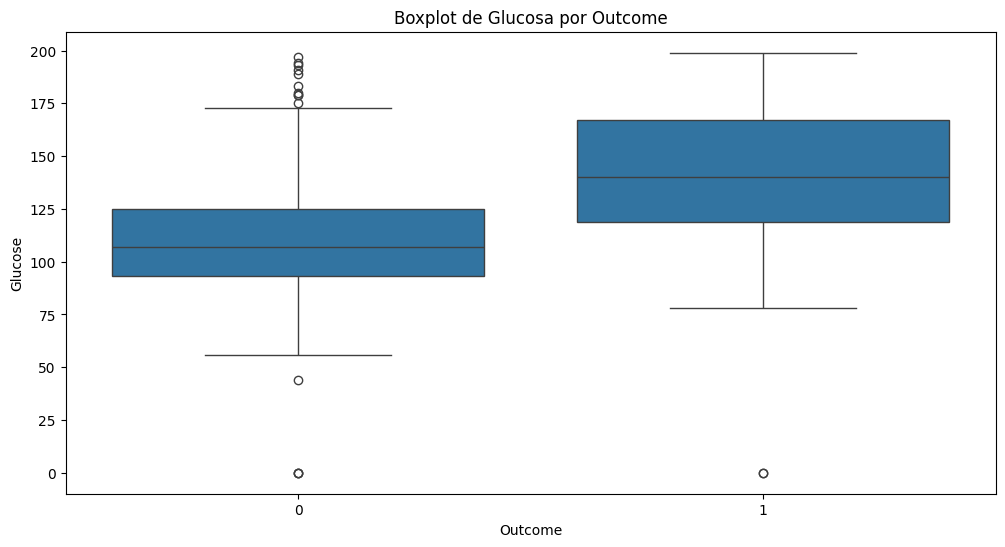

In [335]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Boxplot de Glucosa por Outcome')
plt.show()